In [14]:
import pandas as pd

roi_signals_6mm = pd.read_csv("out02_roi_signals_merge/roi_signals_6mm.txt", sep = ',')
roi_signals_10mm = pd.read_csv("out02_roi_signals_merge/roi_signals_10mm.txt", sep = ',')

subject_info = pd.read_csv("age_gender_edu.txt", sep = ',')
# subject_info2 = pd.read_csv("cc_scan_2_matching.csv", sep = ',')

data = subject_info.merge(roi_signals_10mm, left_on = 'cc_post_intake_id', right_on = 'subj')
# data.replace({'group': {'NTHC': 1, 'TEHC': 2}}, inplace = True)


In [16]:
## We still have some NaN values (after ignoring them in the beta map)
## Ignore NaN: abs(image), 
# replace nan by 0 (-nan command of fslmaths), 
# multiply roi mask, 
# binarize (-bin command of fslmaths)

# data.loc[data['roi'] == 'R_IFJ', :]
data.loc[data['beta_value'].isna(),:]

,cc_post_intake_id,gender,age,yrs_of_edu,subj,group,roi,beta_value
57,1023,1,29,18,1023,NTHC,L_pMFG,NaN
58,1023,1,29,18,1023,NTHC,R_FEF,NaN
59,1023,1,29,18,1023,NTHC,R_M1,NaN
60,1023,1,29,18,1023,NTHC,R_pMFG,NaN
61,1023,1,29,18,1023,NTHC,R_preSMA,NaN
...,...,...,...,...,...,...,...,...
656,2088,1,54,21,2088,TEHC,R_IPL,NaN
657,2088,1,54,21,2088,TEHC,R_M1,NaN
658,2088,1,54,21,2088,TEHC,R_aMFG,NaN
659,2088,1,54,21,2088,TEHC,R_pMFG,NaN


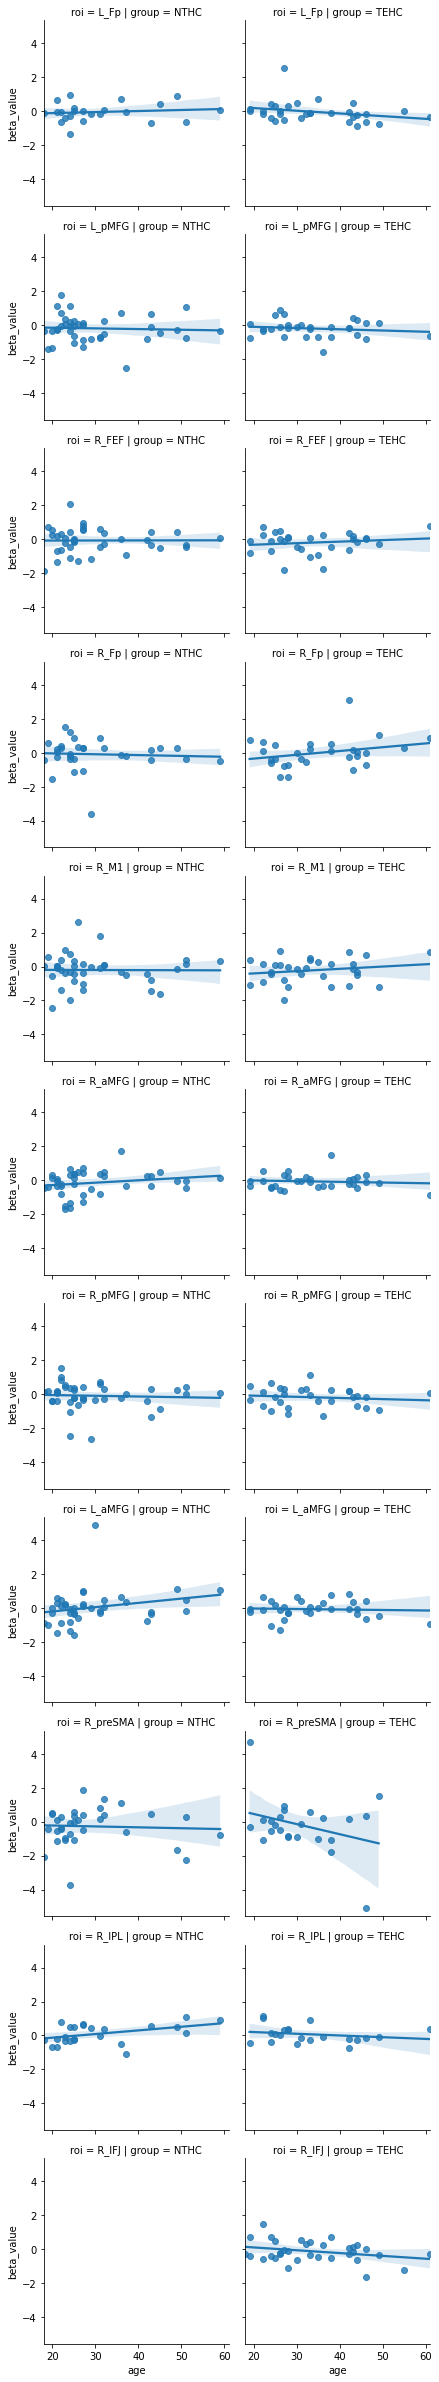

In [17]:
import seaborn as sns

sns.lmplot(
    data=data, x="age", y="beta_value", #hue = 'gender',
    col="group", row="roi", height=3,
)

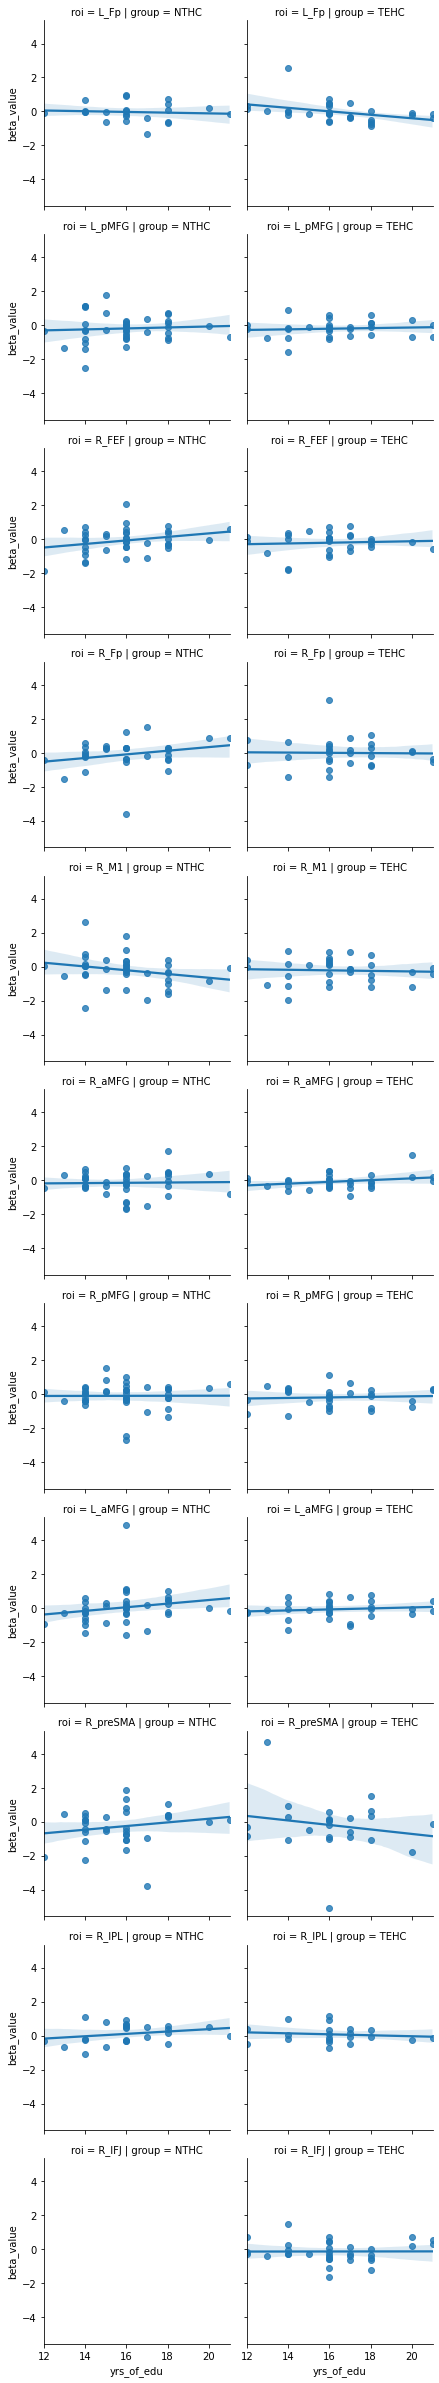

In [18]:
sns.lmplot(
    data=data, x="yrs_of_edu", y="beta_value", #hue = 'gender',
    col="group", row="roi", height=3,
)

In [19]:
import statsmodels.api as sm

roi_list = data.roi.unique()
group_list = data.group.unique()

for group in group_list:
    for roi in roi_list:
        print(group, roi)
        X = data.loc[(data['group']==group) & (data['roi'] == roi) & 
                     (~data['beta_value'].isna()), ['gender', 'age', 'yrs_of_edu']]
        y = data.loc[(data['group']==group) & (data['roi'] == roi) & 
                     (~data['beta_value'].isna()), ['beta_value']]
        if len(y) < 20: continue
        
        X = sm.add_constant(X) # adding a constant
 
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X) 

        print_model = model.summary()
        print(print_model)
        
        

NTHC L_Fp
                            OLS Regression Results                            
Dep. Variable:             beta_value   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    0.3368
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.799
Time:                        15:17:27   Log-Likelihood:                -17.791
No. Observations:                  23   AIC:                             43.58
Df Residuals:                      19   BIC:                             48.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1237      1.017      0.12

                            OLS Regression Results                            
Dep. Variable:             beta_value   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.8584
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.479
Time:                        15:17:27   Log-Likelihood:                -43.679
No. Observations:                  24   AIC:                             95.36
Df Residuals:                      20   BIC:                             100.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4605      2.774      0.887      0.3